In [1]:
import os
import sys

import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare
from simulated_utils import ClippedCtsBanditEnv

In [2]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

In [3]:
env = ClippedCtsBanditEnv(noise_std=0.01)
data_gaussian = compare(env, 'gaussian', n_steps=100, repeats=1,
               lr=1e-1, batch_size=16*32, num_minibatches=16, ppo_epochs=10)
data_gaussian['mean'] = data_gaussian['pd_param_0_mean']
data_gaussian['std'] = data_gaussian['pd_param_1_mean']

/home/eecs/chloehsu/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
%matplotlib inline

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


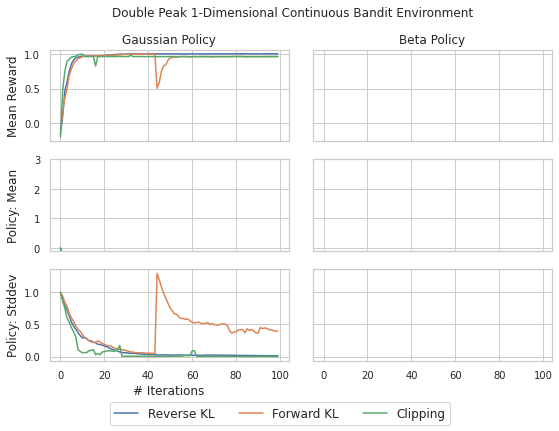

In [5]:
n_boot = 10

data_gaussian = data_gaussian[data_gaussian.method != 'Unregularized']
fig, axes = plt.subplots(3, 2, figsize=(9, 6), sharex=True, sharey='row')
sns.lineplot(data=data_gaussian, x='iter', y='mean_reward', hue='method', ax=axes[0][0], n_boot=n_boot)
axes[0][0].set_ylabel('Mean Reward')
sns.lineplot(data=data_gaussian, x='iter', y='mean', hue='method', ax=axes[1][0], n_boot=n_boot)
axes[1][0].set_ylabel('Policy: Mean')
axes[1][0].set_ylim([-0.1, 3])
sns.lineplot(data=data_gaussian, x='iter', y='std', hue='method', ax=axes[2][0], n_boot=n_boot)
axes[2][0].set_ylabel('Policy: Stddev')

handles, labels = axes.flatten()[0].get_legend_handles_labels()
for ax in axes[:, 0].flatten():
    ax.get_legend().remove()
    ax.set_xlabel('# Iterations')
fig.legend(handles[1:], labels[1:], loc='lower center', ncol=4)

axes[0][0].set_title('Gaussian Policy')
axes[0][1].set_title('Beta Policy')
fig.subplots_adjust(wspace=0.1, bottom=0.16)
fig.align_ylabels(axes[:, 0])

fig.suptitle('Double Peak 1-Dimensional Continuous Bandit Environment')
plt.show()